In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1.0
r1 = 3.0
r2 = 4.0

In [62]:
def finite_diff(x, h):
    
    diff_h = np.zeros(h.shape)
    
    # Endpoints.
    diff_h[0] = (h[1] - h[0]) / (x[1] - x[0])
    diff_h[-1] = (h[-1] - h[-2]) / (x[-1] - x[-2])
    
    # In between
    diff_h[1:-1] = (h[2:] - h[:-2]) / (x[2:] - x[:-2])

    return diff_h
    

In [66]:
def scalar_curvature(r, h):      
    # Compute the scalar curvature.
    h1 = finite_diff(r, h)
    h2 = finite_diff(r, h1)    
    h1_2 = h1 * h1    
    R = 2 * (h1 / (r * (1 + h1_2))) * (((2 * h2) / (1 + h1_2)) + ((3 * h1) / r))    
    return R

In [67]:
def mollify(r, h, epsilon=0.1):
    
    delta_x = r[1] - r[0]
    
    assert epsilon > 100 * delta_x, "Grid too small"
    
    m_x = np.arange(- 1.1 * epsilon, 1.1 * epsilon, delta_x)
    
    m_y = np.piecewise(m_x, [m_x < -epsilon, m_x > epsilon], [0.0, 0.0, lambda x: np.exp(-1 / (1 - (x / epsilon) ** 2))])
    
    m_y /= np.sum(m_y) * delta_x
        
    # Convolution
    n = len(m_x)
    return r[n:-n], h[n:-n], (np.convolve(h, m_y, 'same') * delta_x)[n:-n]        

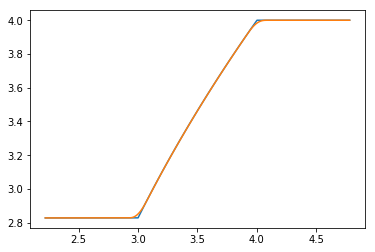

In [68]:
r = np.linspace(r1 - 1, r2 + 1, 10003)

def f(r):
    return np.sqrt(8 * m * (r  - 2 * m))
    
# Build our data.
h = np.piecewise(r, [r < r1, r > r2], [f(r1), f(r2), f])    
r, h, h_m = mollify(r, h)

plt.plot(r, h)
plt.plot(r, h_m)

plt.show()

0.36787944117144233
0.1353352832366127
0.049787068367863944
0.01831563888873418


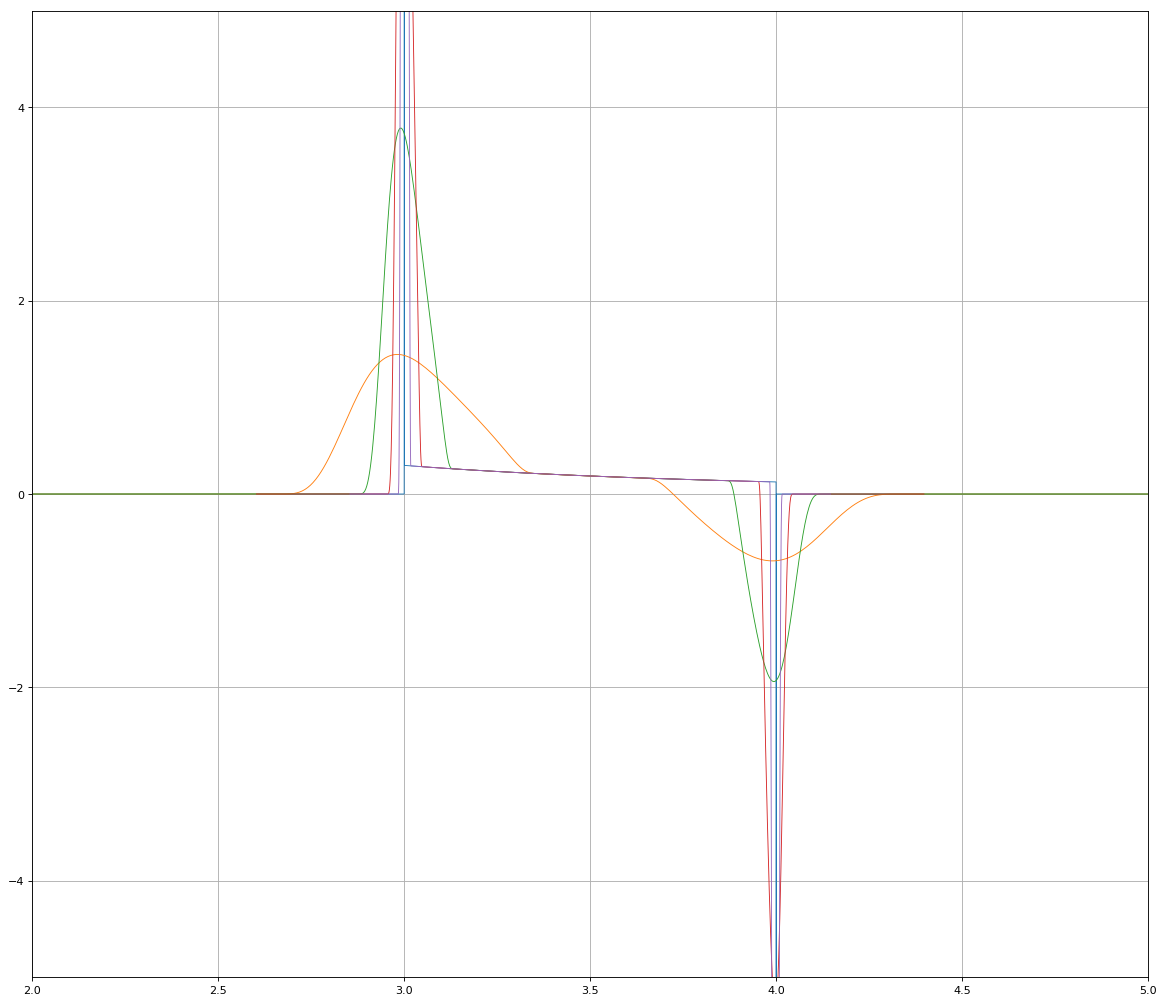

In [90]:

# Image size.
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

def f(r):
    return np.sqrt(8 * m * (r  - 2 * m))
    
# Build our data.
r = np.linspace(r1 - 1, r2 + 1, 10003)
h = np.piecewise(r, [r < r1, r > r2], [f(r1), f(r2), f])
R = scalar_curvature(r, h)
plt.plot(r, R, linewidth=0.8)
plt.grid()

epsilons = np.exp(np.arange(-1, -5, -1))

for epsilon in epsilons:
    
    print(epsilon)
    
    # Grid for the mollifier.
    m_x = np.linspace(-epsilon, epsilon, 103)
    
    # What is our delta_x?
    delta_x = m_x[1] - m_x[0]
    
    # Grid for the function.
    r = np.arange(r1 - 10 * epsilon, r2 + 10 * epsilon, delta_x)
    h = np.piecewise(r, [r < r1, r > r2], [f(r1), f(r2), f])
        
    # Build the mollifier.
    m_y = np.piecewise(m_x, [np.abs(m_x) < epsilon], [lambda x: np.exp(-1 / (1 - (x / epsilon) ** 2)), 0.0])
    m_y /= np.sum(m_y) * delta_x
        
    # Convolution
    n = len(m_x)
    h_m = (np.convolve(h, m_y, 'same') * delta_x)[n:-n]
    r = r[n:-n]
    h = h[n:-n]
    
    # Compute the curvature.
    R_m = scalar_curvature(r, h_m)

    plt.plot(r, R_m, linewidth=0.8)
    
plt.ylim((-5, 5))
plt.xlim((2, 5))
plt.show()
